In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import import_in_df
import numpy as np

sns.set_theme(style="darkgrid")

# Synthetic

## Random Features

In [2]:
dft = import_in_df('./synthetic_submission/rf/', 'tanh')
dfs = import_in_df('./synthetic_submission/rf/', 'square')

In [3]:
for index, row in dft.iterrows():
    if row['k'] > 14000 and row['k'] % 4000 != 0:
        dft.drop(index, inplace=True)
for index, row in dfs.iterrows():
    if row['k'] > 14000 and row['k'] % 4000 != 0:
        dfs.drop(index, inplace=True)

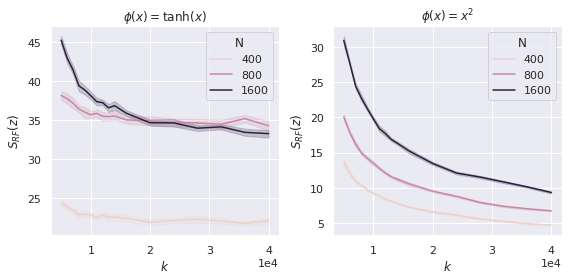

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(x='k', y='S', hue='N', data=dft, ax=ax[0])
sns.lineplot(x='k', y='S', hue='N', data=dfs, ax=ax[1])

ax[0].set_title(r'$\phi(x) = \tanh(x)$')
ax[1].set_title(r'$\phi(x) = x^2$')

ax[0].set_xlabel(r'$k$')
ax[1].set_xlabel(r'$k$')

ax[0].set_ylabel(r'$S_{RF}(z)$')
ax[1].set_ylabel(r'$S_{RF}(z)$')

ax[0].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))
ax[1].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))

fig.tight_layout()
fig.savefig('rf_synthetic.pdf')

In [5]:
dfmt = import_in_df('./MNIST_submission/rf/', 'tanh')
dfms = import_in_df('./MNIST_submission/rf/', 'square')

dfct = import_in_df('./CIFAR-10_submission/rf/', 'tanh')
dfcs = import_in_df('./CIFAR-10_submission/rf/', 'square')

In [6]:
for index, row in dfmt.iterrows():
    if row['k'] > 14000 and row['k'] % 4000 != 1000:
        dfmt.drop(index, inplace=True)
for index, row in dfms.iterrows():
    if row['k'] > 14000 and row['k'] % 4000 != 1000:
        dfms.drop(index, inplace=True)

for index, row in dfct.iterrows():
    if row['k'] > 14000 and row['k'] % 4000 != 1000:
        dfct.drop(index, inplace=True)
for index, row in dfcs.iterrows():
    if row['k'] > 14000 and row['k'] % 4000 != 1000:
        dfcs.drop(index, inplace=True)

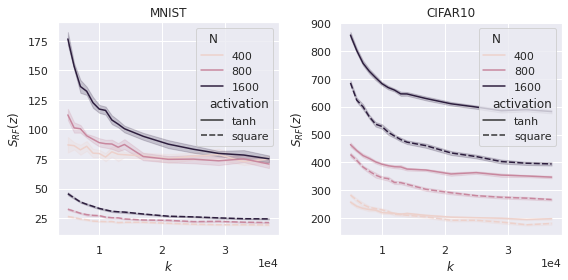

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

dfm = pd.concat([dfmt, dfms]).reset_index(drop=True)
dfc = pd.concat([dfct, dfcs]).reset_index(drop=True)


sns.lineplot(x='k', y='S', hue='N', style='activation', data=dfm, ax=ax[0])
sns.lineplot(x='k', y='S', hue='N', style='activation', data=dfc, ax=ax[1])


ax[0].set_title('MNIST')
ax[0].set_xlabel(r'$k$')
ax[0].set_ylabel(r'$S_{RF}(z)$')
ax[0].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))


ax[1].set_title('CIFAR10')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$S_{RF}(z)$')
ax[1].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))


# ax[0].set_xscale('log')
# ax[1].set_xscale('log')
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
    
fig.tight_layout()
fig.savefig('rf_real.pdf')

## NTK

In [13]:
dft = import_in_df('./synthetic_submission/ntk/', 'tanh')
dfs = import_in_df('./synthetic_submission/ntk/', 'square')

dft['p'] = dft['k'].apply(lambda x: 1000 * x)
dfs['p'] = dfs['k'].apply(lambda x: 1000 * x)

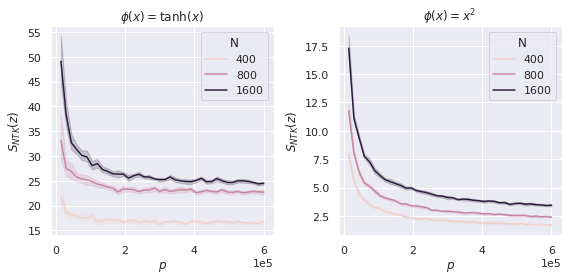

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(x='p', y='S', hue='N', data=dft, ax=ax[0])
sns.lineplot(x='p', y='S', hue='N', data=dfs, ax=ax[1])

ax[0].set_title(r'$\phi(x) = \tanh(x)$')
ax[1].set_title(r'$\phi(x) = x^2$')

ax[0].set_xlabel(r'$p$')
ax[1].set_xlabel(r'$p$')

ax[0].set_ylabel(r'$S_{NTK}(z)$')
ax[1].set_ylabel(r'$S_{NTK}(z)$')

ax[0].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))
ax[1].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))

# ax[0].set_xscale('log')
# ax[1].set_xscale('log')
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
    
fig.tight_layout()
fig.savefig('ntk_synthetic.pdf')

# Real Data

In [15]:
dfmt = import_in_df('./MNIST_submission/ntk/', 'tanh')
dfms = import_in_df('./MNIST_submission/ntk/', 'square')

dfct = import_in_df('./CIFAR-10_submission/ntk/', 'tanh')
dfcs = import_in_df('./CIFAR-10_submission/ntk/', 'square')

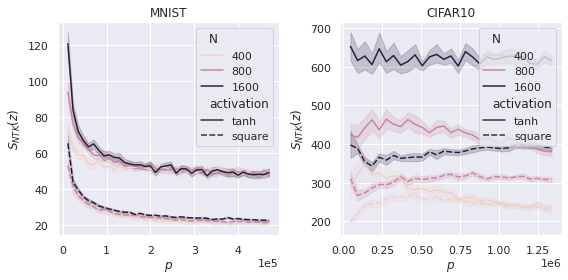

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

dfm = pd.concat([dfmt, dfms]).reset_index(drop=True)

dfc = pd.concat([dfct, dfcs]).reset_index(drop=True)
dfc = dfc.loc[dfc['k'] <= 435]

dfm['p'] = dfm['k'].apply(lambda x: 784 * x)
dfc['p'] = dfc['k'].apply(lambda x: 3072 * x)


sns.lineplot(x='p', y='S', hue='N', style='activation', data=dfm, ax=ax[0])
sns.lineplot(x='p', y='S', hue='N', style='activation', data=dfc, ax=ax[1])


ax[0].set_title('MNIST')
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$S_{NTK}(z)$')
ax[0].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))


ax[1].set_title('CIFAR10')
ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$S_{NTK}(z)$')
ax[1].ticklabel_format(axis='x', style='scientific', scilimits=(0, 0))

# ax[0].set_xscale('log')
# ax[1].set_xscale('log')
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')
    
fig.tight_layout()
fig.savefig('ntk_real.pdf')